## Baseline model Train basic classifiers and evaluate.

## imports + load engineered features

In [1]:
import os, joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

PROCESSED_DIR = "../data/processed"
MODEL_DIR = "../model"
ASSETS_EDA = "../assets/eda"
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(ASSETS_EDA, exist_ok=True)

eng_path = os.path.join(PROCESSED_DIR, "02_feature_engineered.csv")
df = pd.read_csv(eng_path)
print("Loaded engineered:", eng_path)

Loaded engineered: ../data/processed/02_feature_engineered.csv


## Prepare X, y

In [2]:
y = df['churn_flag']
X = df.drop(columns=['churn_flag']).copy()
print("X shape", X.shape, "y distribution:\n", y.value_counts(normalize=True))

X shape (3000, 18) y distribution:
 churn_flag
0    0.595
1    0.405
Name: proportion, dtype: float64


## Train/test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# save splits for reproducibility
X_train.join(y_train).to_csv(os.path.join(PROCESSED_DIR, "train_set.csv"), index=False)
X_test.join(y_test).to_csv(os.path.join(PROCESSED_DIR, "test_set.csv"), index=False)
print("Saved train_set.csv and test_set.csv")

Saved train_set.csv and test_set.csv


## Train RandomForest (baseline)

In [4]:
clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print(f"Train acc: {train_acc:.4f} | Test acc: {test_acc:.4f}")

Train acc: 1.0000 | Test acc: 0.5850


## Evaluation details

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.78      0.69       357
           1       0.48      0.30      0.37       243

    accuracy                           0.58       600
   macro avg       0.55      0.54      0.53       600
weighted avg       0.56      0.58      0.56       600



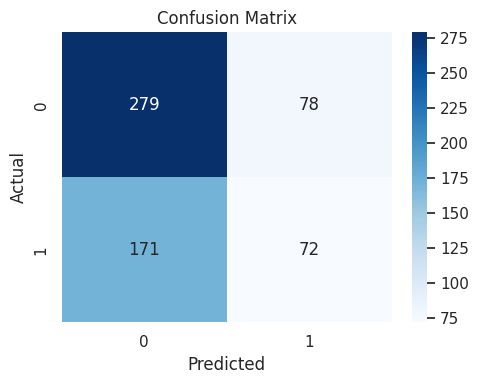

In [5]:
y_pred = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_EDA, "05_confusion_matrix.png"))
plt.show()

## Feature importance plot & save

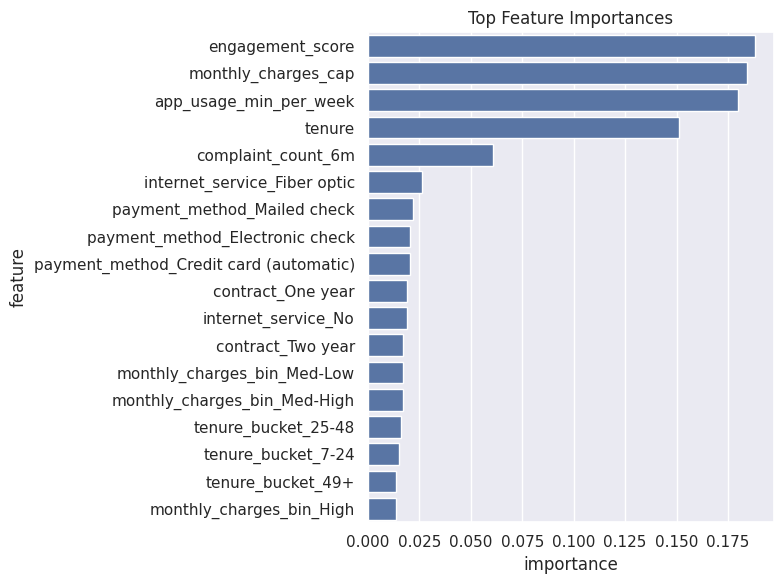

In [6]:
importances = clf.feature_importances_
feat_names = X.columns
imp_df = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values("importance", ascending=False).head(30)

plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, x='importance', y='feature')
plt.title('Top Feature Importances')
plt.tight_layout()
plt.savefig(os.path.join(ASSETS_EDA, "06_feature_importance.png"))
plt.show()

## Save model & artifacts

In [7]:
model_path = os.path.join(MODEL_DIR, "model_rf.pkl")
joblib.dump(clf, model_path)
print("✅ Saved model to", model_path)

# Save a short model card
model_card = {
    "model": "RandomForestClassifier",
    "train_acc": float(train_acc),
    "test_acc": float(test_acc),
    "n_features": X.shape[1]
}
import json
with open(os.path.join(MODEL_DIR, "model_card.json"), "w") as f:
    json.dump(model_card, f, indent=2)
print("✅ Saved model_card.json")

✅ Saved model to ../model/model_rf.pkl
✅ Saved model_card.json


## Quick sanity: list files saved

In [8]:
import os
print("Processed files:", os.listdir(PROCESSED_DIR))
print("Model files:", os.listdir(MODEL_DIR))
print("EDA assets:", os.listdir(ASSETS_EDA))

Processed files: ['features_meta.json', '02_feature_engineered.csv', '01_after_eda.csv', 'train_set.csv', 'model_input_sample.csv', 'test_set.csv']
Model files: ['model_rf.pkl', 'model_card.json']
EDA assets: ['01_eda_InitialChecks.png', '02_feature_engineering_Encoding_Features.png', '01_eda_LoadData.png', '04_correlation_heatmap.png', '05_confusion_matrix.png', '01_churn_distribution.png', '06_feature_importance.png', '02_churn_by_contract.png', '03_modeling_TrainExample.png', '03_monthly_charges_boxplot.png', '01_eda_Distribution_Plots.png']
